In [617]:
import scanpy as sc
import anndata
import numpy as np
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
adata=sc.read("../../important_processed_data/4.17_wt_integrate_SCRAN_log1p_scANVI.h5ad")

In [282]:
adata.obs["Age"]=adata.obs["Age"].replace('Organogenesis stage',"Embryo")
adata.obs["Age"]=adata.obs["Age"].replace('Fetal stage',"Embryo")

In [356]:
scMeta=pd.read_csv("../data/5.16_core_Atlas.csv")

In [362]:
scMeta.columns

Index(['Sample', 'Project', 'batch', 'Core Dataset', 'Limb Atlas',
       'Cranial Atlas', 'Organ', 'Tissue', 'Tissue(Specific)', 'Stage',
       'Gene type', 'Treatment', 'Age', 'Age(In Detail)', 'Machine', 'Species',
       'Isolation approach', 'Digestion', 'Enzymes', 'Cre',
       'Bone Forming Methods', 'Data Source', 'Related Assay',
       'Cell Count After QC', 'Origin'],
      dtype='object')

In [357]:
adata

AnnData object with n_obs × n_vars = 272369 × 62934
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

In [351]:
adata_obs=adata.obs

In [367]:
# Create a dictionary mapping samples to annotations
anno_dict = dict(zip(scMeta['Sample'], scMeta['Tissue']))

# Map the sample column to the annotation column using the dictionary
adata_obs['Tissue'] = adata_obs['Sample'].map(anno_dict)

# Print the updated data DataFrame
adata_obs["Tissue"]
# Create a dictionary mapping samples to annotations
anno_dict = dict(zip(scMeta['Sample'], scMeta['Stage']))

# Map the sample column to the annotation column using the dictionary
adata_obs['Stage'] = adata_obs['Sample'].map(anno_dict)

# Create a dictionary mapping samples to annotations
anno_dict = dict(zip(scMeta['Sample'], scMeta['Tissue(Specific)']))
# Map the sample column to the annotation column using the dictionary
adata_obs['Tissue.Specific.'] = adata_obs['Sample'].map(anno_dict)
# Create a dictionary mapping samples to annotations

anno_dict = dict(zip(scMeta['Sample'], scMeta['Age']))

# Map the sample column to the annotation column using the dictionary
adata_obs['Age'] = adata_obs['Sample'].map(anno_dict)

anno_dict = dict(zip(scMeta['Sample'], scMeta['Age(In Detail)']))

adata_obs['Age.In.Detail.'] = adata_obs['Sample'].map(anno_dict)

anno_dict = dict(zip(scMeta['Sample'], scMeta['Origin']))
# Map the sample column to the annotation column using the dictionary
adata_obs['Origin'] = adata_obs['Sample'].map(anno_dict)

In [355]:
adata_obs

,orig.ident,nCount_originalexp,nFeature_originalexp,Sample,Project,Limb.Atlas,Organ,Tissue,Tissue.Specific.,Stage,...,C90,C137,C2_named,C7_named,C19_named,C36_named,C49_named,C90_named,C137_named,sample_coarse
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0,Suture2021_Farmer_E17,11668.0,3222,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C90-1,C137-1,Non-osteo,MSC,Late.MSC,Alcam.Late.MSC,Eln.Alcam.Late.MSC,Eln.Alcam.Late.MSC,Tnn.Eln.Alcam.Late.MSC,Suture2021_Farmer_E17__Mix_Mesenchyme
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0,Suture2021_Farmer_E17,14744.0,3910,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C90-34,C137-54,Non-osteo,Ly6a+ MSC,Ly6a+ MSC,Col6a6.Ly6a+ MSC,Pi16.Col6a6.Ly6a+ MSC,Pi16.Col6a6.Ly6a+ MSC,Krtdap.Pi16.Col6a6.Ly6a+ MSC,Suture2021_Farmer_E17__C_Hypodermis
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0,Suture2021_Farmer_E17,14962.0,3533,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C90-88,C137-130,Ob,Ob,Ob,Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob,Suture2021_Farmer_E17__Mix_Mesenchyme
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0,Suture2021_Farmer_E17,14473.0,3565,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C90-88,C137-130,Ob,Ob,Ob,Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob,Suture2021_Farmer_E17__Mix_Osteoblast
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0,Suture2021_Farmer_E17,14249.0,3968,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C90-41,C137-63,Non-osteo,Lepr+ BMSC,Lepr+ BMSC,Col6a5.Lepr+ BMSC,Slc16a9.Col6a5.Lepr+ BMSC,Atp1b1.Slc16a9.Col6a5.Lepr+ BMSC,Atp1b1.Slc16a9.Col6a5.Lepr+ BMSC,Suture2021_Farmer_E17__Mix_Mesenchyme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTGTATTTCCT-1_5-1-2,Metaphysis_Yang_sorted,11255.0,3122,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,Development,...,C90-12,C137-22,Non-osteo,MSC,Pre-ob,Otos.Pre-ob,Vcan+ MP BMSC,Vcan+ MP BMSC,Vcan+ MP BMSC,Metaphysis_Yang_sorted__Mix_Osteoblast
TTTGACTGTTGCATTG-1_5-1-2,Metaphysis_Yang_sorted,2748.0,1298,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,Development,...,C90-7,C137-13,Non-osteo,MSC,Pre-ob,Dapk2.Pre-ob,Birc5.Dapk2.Pre-ob,Dmp1.Birc5.Dapk2.Pre-ob,Tcf7.Dmp1.Birc5.Dapk2.Pre-ob,Metaphysis_Yang_sorted__Mix_Osteoblast
TTTGACTTCTTGGGCG-1_5-1-2,Metaphysis_Yang_sorted,18312.0,4340,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,Development,...,C90-60,C137-88,Non-osteo,Chondro,HC,Pde11a.HC,Pde11a.HC,Ffar4.Pde11a.HC,Ocm.Ffar4.Pde11a.HC,Metaphysis_Yang_sorted__Mix_Chondrocyte


In [353]:
adata_obs["Sample"].unique()

['Suture2021_Farmer_E17', 'Suture2021_Farmer_E15', 'CranioSoxc_Angelozzi_WTE11.5', 'CranioSoxc_Angelozzi_WTE12.5', 'CranioSoxc_Angelozzi_WTE13.5', ..., 'Metaphysis_Yang_1', 'Metaphysis_Yang_2', 'Metaphysis_Yang_3', 'Metaphysis_Yang_4', 'Metaphysis_Yang_sorted']
Length: 110
Categories (110, object): ['Ablation_Matsushita_abl7con1', 'Ablation_Matsushita_abl7con2', 'Ablation_Matsushita_abl14', 'Ablation_Matsushita_cxcl1', ..., 'lambdoid_Holmes_P28', 'sagittal_Holmes_E18', 'sagittal_Holmes_P10', 'sagittal_Holmes_P28']

In [349]:
scMeta["Sample"]

0                 CalvariaP4_Ayturk
1              coronal_Holmes_E16_1
2              coronal_Holmes_E16_2
3              coronal_Holmes_E18_1
4              coronal_Holmes_E18_2
                   ...             
100      BmscSpecification_Kishor_3
101      BmscSpecification_Kishor_4
102    Septoclasts_Kishor_Longbone1
103    Septoclasts_Kishor_Longbone2
104       Septoclasts_Kishor_Pdgfra
Name: Sample, Length: 105, dtype: object

In [354]:
adata

AnnData object with n_obs × n_vars = 272369 × 62934
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

In [4]:
scMeta=pd.read_csv("../../important_processed_data/5.6_wt_integrate_metadata.csv")

/tmp/ipykernel_3030454/1707352457.py:1: DtypeWarning: Columns (17,18,19,21,22,23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  scMeta=pd.read_csv("../../important_processed_data/5.6_wt_integrate_metadata.csv")


In [12]:
cellSubset=scMeta["Unnamed: 0"].to_numpy().astype(str)

In [6]:
adata_bk=adata

In [19]:
cellSubset

array(['Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0', ...,
       'TTTGACTTCTTGGGCG-1_5-1-2', 'TTTGGAGCAGCGACAA-1_5-1-2',
       'TTTGGTTCACTACTTT-1_5-1-2'], dtype='<U71')

In [20]:
cell_names = adata.obs_names

bool_index=cell_names.isin(cellSubset)

# 使用布尔索引子集化 AnnData 对象
subset_adata = adata[bool_index]

In [30]:
subset_adata.obs_names.to_numpy().astype(str)

array(['Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0', ...,
       'TTTGACTTCTTGGGCG-1_5-1-2', 'TTTGGAGCAGCGACAA-1_5-1-2',
       'TTTGGTTCACTACTTT-1_5-1-2'], dtype='<U71')

In [32]:

cellSubset == subset_adata.obs_names.to_numpy().astype(str)

array([ True,  True,  True, ...,  True,  True,  True])

In [35]:
boolean=cellSubset == subset_adata.obs_names.to_numpy().astype(str)

In [36]:

if boolean.all:
  print("The arrays are equal")
else:
  print("The arrays are not equal")

The arrays are equal


In [40]:
scMeta

,Unnamed: 0,orig.ident,nCount_originalexp,nFeature_originalexp,Sample,Project,Limb.Atlas,Organ,Tissue,Tissue.Specific.,...,C49,C90,C137,C2_named,C7_named,C19_named,C36_named,C49_named,C90_named,C137_named
0,Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0,Suture2021_Farmer_E17,11668.0,3222,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,...,C49-1,C90-1,C137-1,Non-osteo,MSC,Late.MSC,Alcam.Late.MSC,Eln.Alcam.Late.MSC,Eln.Alcam.Late.MSC,Tnn.Eln.Alcam.Late.MSC
1,Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0,Suture2021_Farmer_E17,14744.0,3910,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,...,C49-17,C90-34,C137-54,Non-osteo,Ly6a+ MSC,Ly6a+ MSC,Col6a6.Ly6a+ MSC,Pi16.Col6a6.Ly6a+ MSC,Pi16.Col6a6.Ly6a+ MSC,Krtdap.Pi16.Col6a6.Ly6a+ MSC
2,Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0,Suture2021_Farmer_E17,14962.0,3533,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,...,C49-47,C90-88,C137-130,Ob,Ob,Ob,Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob
3,Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0,Suture2021_Farmer_E17,14473.0,3565,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,...,C49-47,C90-88,C137-130,Ob,Ob,Ob,Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob
4,Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0,Suture2021_Farmer_E17,14249.0,3968,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,...,C49-20,C90-41,C137-63,Non-osteo,Lepr+ BMSC,Lepr+ BMSC,Col6a5.Lepr+ BMSC,Slc16a9.Col6a5.Lepr+ BMSC,Atp1b1.Slc16a9.Col6a5.Lepr+ BMSC,Atp1b1.Slc16a9.Col6a5.Lepr+ BMSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272364,TTTGACTGTATTTCCT-1_5-1-2,Metaphysis_Yang_sorted,11255.0,3122,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,...,C49-9,C90-12,C137-22,Non-osteo,MSC,Pre-ob,Otos.Pre-ob,Vcan+ MP BMSC,Vcan+ MP BMSC,Vcan+ MP BMSC
272365,TTTGACTGTTGCATTG-1_5-1-2,Metaphysis_Yang_sorted,2748.0,1298,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,...,C49-6,C90-7,C137-13,Non-osteo,MSC,Pre-ob,Dapk2.Pre-ob,Birc5.Dapk2.Pre-ob,Dmp1.Birc5.Dapk2.Pre-ob,Tcf7.Dmp1.Birc5.Dapk2.Pre-ob
272366,TTTGACTTCTTGGGCG-1_5-1-2,Metaphysis_Yang_sorted,18312.0,4340,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,...,C49-30,C90-60,C137-88,Non-osteo,Chondro,HC,Pde11a.HC,Pde11a.HC,Ffar4.Pde11a.HC,Ocm.Ffar4.Pde11a.HC
272367,TTTGGAGCAGCGACAA-1_5-1-2,Metaphysis_Yang_sorted,70471.0,6264,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,...,C49-49,C90-90,C137-135,Ob,Ob,Ob,Bglap3.Ob,Bglap3.Ob,Bglap3.Ob,Ptprz1.Bglap3.Ob


In [41]:
scMeta=scMeta.set_index("Unnamed: 0")

In [42]:
scMeta

,orig.ident,nCount_originalexp,nFeature_originalexp,Sample,Project,Limb.Atlas,Organ,Tissue,Tissue.Specific.,Stage,...,C49,C90,C137,C2_named,C7_named,C19_named,C36_named,C49_named,C90_named,C137_named
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0,Suture2021_Farmer_E17,11668.0,3222,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C49-1,C90-1,C137-1,Non-osteo,MSC,Late.MSC,Alcam.Late.MSC,Eln.Alcam.Late.MSC,Eln.Alcam.Late.MSC,Tnn.Eln.Alcam.Late.MSC
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0,Suture2021_Farmer_E17,14744.0,3910,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C49-17,C90-34,C137-54,Non-osteo,Ly6a+ MSC,Ly6a+ MSC,Col6a6.Ly6a+ MSC,Pi16.Col6a6.Ly6a+ MSC,Pi16.Col6a6.Ly6a+ MSC,Krtdap.Pi16.Col6a6.Ly6a+ MSC
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0,Suture2021_Farmer_E17,14962.0,3533,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C49-47,C90-88,C137-130,Ob,Ob,Ob,Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0,Suture2021_Farmer_E17,14473.0,3565,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C49-47,C90-88,C137-130,Ob,Ob,Ob,Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0,Suture2021_Farmer_E17,14249.0,3968,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C49-20,C90-41,C137-63,Non-osteo,Lepr+ BMSC,Lepr+ BMSC,Col6a5.Lepr+ BMSC,Slc16a9.Col6a5.Lepr+ BMSC,Atp1b1.Slc16a9.Col6a5.Lepr+ BMSC,Atp1b1.Slc16a9.Col6a5.Lepr+ BMSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTGTATTTCCT-1_5-1-2,Metaphysis_Yang_sorted,11255.0,3122,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,Development,...,C49-9,C90-12,C137-22,Non-osteo,MSC,Pre-ob,Otos.Pre-ob,Vcan+ MP BMSC,Vcan+ MP BMSC,Vcan+ MP BMSC
TTTGACTGTTGCATTG-1_5-1-2,Metaphysis_Yang_sorted,2748.0,1298,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,Development,...,C49-6,C90-7,C137-13,Non-osteo,MSC,Pre-ob,Dapk2.Pre-ob,Birc5.Dapk2.Pre-ob,Dmp1.Birc5.Dapk2.Pre-ob,Tcf7.Dmp1.Birc5.Dapk2.Pre-ob
TTTGACTTCTTGGGCG-1_5-1-2,Metaphysis_Yang_sorted,18312.0,4340,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,Development,...,C49-30,C90-60,C137-88,Non-osteo,Chondro,HC,Pde11a.HC,Pde11a.HC,Ffar4.Pde11a.HC,Ocm.Ffar4.Pde11a.HC


In [43]:
subset_adata.obs=scMeta

In [44]:
subset_adata.obs

,orig.ident,nCount_originalexp,nFeature_originalexp,Sample,Project,Limb.Atlas,Organ,Tissue,Tissue.Specific.,Stage,...,C49,C90,C137,C2_named,C7_named,C19_named,C36_named,C49_named,C90_named,C137_named
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0,Suture2021_Farmer_E17,11668.0,3222,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C49-1,C90-1,C137-1,Non-osteo,MSC,Late.MSC,Alcam.Late.MSC,Eln.Alcam.Late.MSC,Eln.Alcam.Late.MSC,Tnn.Eln.Alcam.Late.MSC
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0,Suture2021_Farmer_E17,14744.0,3910,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C49-17,C90-34,C137-54,Non-osteo,Ly6a+ MSC,Ly6a+ MSC,Col6a6.Ly6a+ MSC,Pi16.Col6a6.Ly6a+ MSC,Pi16.Col6a6.Ly6a+ MSC,Krtdap.Pi16.Col6a6.Ly6a+ MSC
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0,Suture2021_Farmer_E17,14962.0,3533,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C49-47,C90-88,C137-130,Ob,Ob,Ob,Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0,Suture2021_Farmer_E17,14473.0,3565,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C49-47,C90-88,C137-130,Ob,Ob,Ob,Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob,Ifitm5.Col22a1.Ob
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0,Suture2021_Farmer_E17,14249.0,3968,Suture2021_Farmer_E17,Suture2021_Farmer,False,Head,Suture mesenchyme,Coronal suture,Development,...,C49-20,C90-41,C137-63,Non-osteo,Lepr+ BMSC,Lepr+ BMSC,Col6a5.Lepr+ BMSC,Slc16a9.Col6a5.Lepr+ BMSC,Atp1b1.Slc16a9.Col6a5.Lepr+ BMSC,Atp1b1.Slc16a9.Col6a5.Lepr+ BMSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTGTATTTCCT-1_5-1-2,Metaphysis_Yang_sorted,11255.0,3122,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,Development,...,C49-9,C90-12,C137-22,Non-osteo,MSC,Pre-ob,Otos.Pre-ob,Vcan+ MP BMSC,Vcan+ MP BMSC,Vcan+ MP BMSC
TTTGACTGTTGCATTG-1_5-1-2,Metaphysis_Yang_sorted,2748.0,1298,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,Development,...,C49-6,C90-7,C137-13,Non-osteo,MSC,Pre-ob,Dapk2.Pre-ob,Birc5.Dapk2.Pre-ob,Dmp1.Birc5.Dapk2.Pre-ob,Tcf7.Dmp1.Birc5.Dapk2.Pre-ob
TTTGACTTCTTGGGCG-1_5-1-2,Metaphysis_Yang_sorted,18312.0,4340,Metaphysis_Yang_sorted,Metaphysis_Yang,True,Limb_adult,Femur;Tibia,Metaphysis,Development,...,C49-30,C90-60,C137-88,Non-osteo,Chondro,HC,Pde11a.HC,Pde11a.HC,Ffar4.Pde11a.HC,Ocm.Ffar4.Pde11a.HC


In [45]:
adata=subset_adata

In [46]:
del subset_adata

In [50]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_scANVI')

2023-05-06 23:25:20.230072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 23:25:20.890961: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-06 23:25:20.890985: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-06 23:25:22.305329: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [73]:
connectivePd=adata.uns["paga"]["connectivities"].toarray()
connectivePd=pd.DataFrame(connectivePd)

In [111]:
connectivePd_masked

,Ablation_Matsushita_abl7con1__LA_Diaphyseal MSC,Ablation_Matsushita_abl7con1__LA_Fibroblast,Ablation_Matsushita_abl7con1__Mix_Osteoblast,Ablation_Matsushita_abl7con1__Mix_Pericyte,Ablation_Matsushita_abl7con2__LA_Diaphyseal MSC,Ablation_Matsushita_abl7con2__LA_Fibroblast,Ablation_Matsushita_abl7con2__Mix_Osteoblast,Ablation_Matsushita_abl7con2__Mix_Pericyte,Ablation_Matsushita_abl14__LA_Diaphyseal MSC,Ablation_Matsushita_abl14__LA_Fibroblast,...,lambdoid_Holmes_P28__Mix_Mesenchyme,lambdoid_Holmes_P28__Mix_Osteoblast,sagittal_Holmes_E18__C_Hypodermis,sagittal_Holmes_E18__Mix_Chondrocyte,sagittal_Holmes_E18__Mix_Mesenchyme,sagittal_Holmes_E18__Mix_Osteoblast,sagittal_Holmes_P10__Mix_Mesenchyme,sagittal_Holmes_P10__Mix_Osteoblast,sagittal_Holmes_P28__Mix_Mesenchyme,sagittal_Holmes_P28__Mix_Osteoblast
Ablation_Matsushita_abl7con1__Mix_Osteoblast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Ablation_Matsushita_abl7con2__Mix_Osteoblast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Ablation_Matsushita_abl14__Mix_Osteoblast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Ablation_Matsushita_cxcl1__Mix_Osteoblast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Ablation_Matsushita_cxcl2__Mix_Osteoblast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lambdoid_Holmes_P10__Mix_Osteoblast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
lambdoid_Holmes_P28__Mix_Osteoblast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
sagittal_Holmes_E18__Mix_Osteoblast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.319684,0.0,0.0,0.0,0.0,0.0
sagittal_Holmes_P10__Mix_Osteoblast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0


In [130]:
connectivePd[1:4]

,Ablation_Matsushita_abl7con1__LA_Diaphyseal MSC,Ablation_Matsushita_abl7con1__LA_Fibroblast,Ablation_Matsushita_abl7con1__Mix_Osteoblast,Ablation_Matsushita_abl7con1__Mix_Pericyte,Ablation_Matsushita_abl7con2__LA_Diaphyseal MSC,Ablation_Matsushita_abl7con2__LA_Fibroblast,Ablation_Matsushita_abl7con2__Mix_Osteoblast,Ablation_Matsushita_abl7con2__Mix_Pericyte,Ablation_Matsushita_abl14__LA_Diaphyseal MSC,Ablation_Matsushita_abl14__LA_Fibroblast,...,lambdoid_Holmes_P28__Mix_Mesenchyme,lambdoid_Holmes_P28__Mix_Osteoblast,sagittal_Holmes_E18__C_Hypodermis,sagittal_Holmes_E18__Mix_Chondrocyte,sagittal_Holmes_E18__Mix_Mesenchyme,sagittal_Holmes_E18__Mix_Osteoblast,sagittal_Holmes_P10__Mix_Mesenchyme,sagittal_Holmes_P10__Mix_Osteoblast,sagittal_Holmes_P28__Mix_Mesenchyme,sagittal_Holmes_P28__Mix_Osteoblast
Ablation_Matsushita_abl7con1__LA_Fibroblast,0.546891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ablation_Matsushita_abl7con1__Mix_Osteoblast,0.911485,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.563118,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Ablation_Matsushita_abl7con1__Mix_Pericyte,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
adata.obs["sample_coarse"]=adata.obs["Sample"].astype(str)+"__"+adata.obs["mix_level_2"].astype(str)

In [70]:
sc.tl.paga(adata, groups='sample_coarse')

In [74]:
connectivePd=connectivePd.set_index(adata.obs["sample_coarse"].cat.categories)
connectivePd.columns=adata.obs["sample_coarse"].cat.categories

In [135]:
labelCategory=np.array(adata.obs["sample_coarse"].cat.categories)
labelCategory= np.array(["__".join(s.split("__")[:-1]) for s in labelCategory])
df = pd.DataFrame(True, columns=labelCategory, index=labelCategory)
for i in labelCategory:
    df.loc[i,i] = False
df=df.set_index(adata.obs["sample_coarse"].cat.categories)
df.columns=adata.obs["sample_coarse"].cat.categories
connectivePd_masked = connectivePd.mask(df, 0)

In [137]:
osteoblastCategory= np.array([s.split("_")[-1] for s in np.array(adata.obs["sample_coarse"].cat.categories)])
osteoLogic=osteoblastCategory=="Osteoblast"
connectivePd_masked=connectivePd_masked.iloc[osteoLogic,:]
osteoSum=connectivePd_masked.sum()

In [139]:
data = {'Column 1': osteoSum, 'Column 2': labelCategory,'Column 3':osteoblastCategory}

# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data)

In [140]:
np.unique(np.array(osteoblastCategory))

array(['Chondrocyte', 'Diaphyseal MSC', 'Fibroblast', 'Hypodermis',
       'Mesenchyme', 'Osteoblast', 'Pericyte', 'Sox18+ Dermis'],
      dtype='<U14')

In [183]:
heatmapDf=pd.DataFrame(0,columns=['Chondrocyte', 'Diaphyseal MSC', 'Mesenchyme',"Fibroblast","Pericyte"],index=np.unique(labelCategory))

In [184]:
df
df_wide = df.pivot(index='Column 2', columns='Column 3', values='Column 1')

In [200]:
df_wide = df.pivot(index='Column 2', columns='Column 3', values='Column 1')
df_wide=df_wide.loc[:, ['Chondrocyte', 'Diaphyseal MSC', 'Mesenchyme',"Fibroblast"]]

# calculate row sums and get index of rows where sum is 0
row_sums = df_wide.sum(axis=1)
zero_sum_rows = row_sums[row_sums == 0].index
df_wide=df_wide.fillna(0)
# drop rows with zero sum
df_wide = df_wide.drop(index=zero_sum_rows)

In [538]:
df_new = adata_obs[["Sample","Age","Age.In.Detail.","Organ", 'Tissue',
                    'Tissue.Specific.',"Stage","Bone.Forming.Methods","Origin"]]
table=df_new.groupby("Sample")["Age","Age.In.Detail.","Organ", 'Tissue',
                    'Tissue.Specific.',"Stage","Bone.Forming.Methods","Origin"].first().reset_index()
table=table.set_index("Sample")
table=table.loc[df_wide.index.to_numpy(),: ]


/tmp/ipykernel_3030454/1730670227.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  table=df_new.groupby("Sample")["Age","Age.In.Detail.","Organ", 'Tissue',


In [539]:
table["Stage"].unique()

array(['Injury(Regeneration)', 'Steady', 'Development'], dtype=object)

In [540]:
table["Tissue"] = pd.Categorical(table["Tissue"], categories=['Cranial mesenchyme','Maxillary mesenchyme',
                                                              'Suture mesenchyme','Mandible mesenchyme', 'Calvarial bone',
                                                              'Forelimb',  'Hindlimbs',
                                                              'Femur','Femur;Tibia', 'Femur;Tibia;Fibula'], ordered=True)

In [541]:
adata_obs["Age.In.Detail."].unique()

array(['E17', 'E15', 'E11.5', 'E12.5', 'E13.5', 'E15.5', 'E17.5', 'P5',
       'E14.5', 'P10', 'E16.5', 'E18.5', 'P28', 'E10.5', 'E9', 'E10',
       'E18', 'E16', 'E12', 'E11', 'E13', 'E14', '4W', 'Adult', '2M',
       'P23', '4M', '18M', 'P21', '3W', '1M', '1.5M', '3M', '16M', 'P13',
       'P19', 'P2', 'P7.5'], dtype=object)

In [542]:
table["Age.In.Detail."] = pd.Categorical(table["Age.In.Detail."], categories=['E11.5','E13','E13.5', 'E14','E14.5','E15',
                                                                              'E15.5', 'E16.5','E17',
                                              'E17.5','E18',   'E18.5', 'P5','P7.5', 'P10', '3W', 'P21', 'P23',
                                              'P28', '4W','1M',  '1.5M','2M',
                                              '3M', '4M','Adult', '16M','18M'], ordered=True)

In [543]:
table["Tissue.Specific."].unique()

array(['Diaphysis', 'Bone', 'Stroma', 'Diaphysis and Epiphysis',
       'Calvarial bone', 'Limb Bud', 'Cranial mesenchyme',
       'Frontal suture', 'Mandible mesenchyme', 'Maxillary mesenchyme',
       'Metaphysis', 'Perichondrial', 'Coronal suture', 'Lambdoid suture',
       'Sagittal suture'], dtype=object)

In [569]:
table["Tissue.Specific."] = pd.Categorical(table["Tissue.Specific."], categories=['Cranial mesenchyme',
       'Frontal suture', 'Mandible mesenchyme', 'Maxillary mesenchyme','Calvarial bone','Coronal suture', 'Lambdoid suture','Sagittal suture',
       'Metaphysis', 'Perichondrial', 'Limb Bud',
       'Diaphysis', 'Bone', 'Stroma', 'Diaphysis and Epiphysis'], ordered=True)

In [570]:
table["Age.In.Detail."].unique()

['4W', 'Adult', 'P28', '2M', 'P23', ..., 'P7.5', 'E11.5', 'E17', 'E18', 'P10']
Length: 28
Categories (28, object): ['E11.5' < 'E13' < 'E13.5' < 'E14' ... '4M' < 'Adult' < '16M' < '18M']

In [571]:
color_map_age = dict(zip([ 'Organogenesis stage','Fetal stage', 'Postnatal', 'Young Adult', 'Adult','Old'],
                         sns.color_palette("ch:s=.25,rot=-.25", n_colors=6)))
color_map_ageindetail = dict(zip(table["Age.In.Detail."].values.categories,
                         sns.color_palette("ch:s=.25,rot=-.25", n_colors=len(table["Age.In.Detail."].values.categories))))
color_map_organ = dict(zip(table["Organ"].values.categories,
                         sns.color_palette('Spectral', n_colors=len(table["Organ"].values.categories))))
color_map_stage = dict(zip(table["Stage"].unique(),
                         sns.color_palette('Spectral', n_colors=len(table["Stage"].unique()))))
color_map_tissuespecific = dict(zip(table["Tissue.Specific."].values.categories,
                         sns.color_palette('Spectral', n_colors=len(table["Tissue.Specific."].unique()))))
color_map_tissue = dict(zip(table["Tissue"].values.categories,
                         sns.color_palette('Spectral', n_colors=len(table["Tissue"].values.categories))))
color_map_orgin = dict(zip(table["Origin"].unique(),
                         sns.color_palette('pastel', n_colors=len(table["Origin"].unique()))))
color_map_form = dict(zip(table["Bone.Forming.Methods"].values.categories,
                         sns.color_palette('pastel', n_colors=len(table["Bone.Forming.Methods"].values.categories))))

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


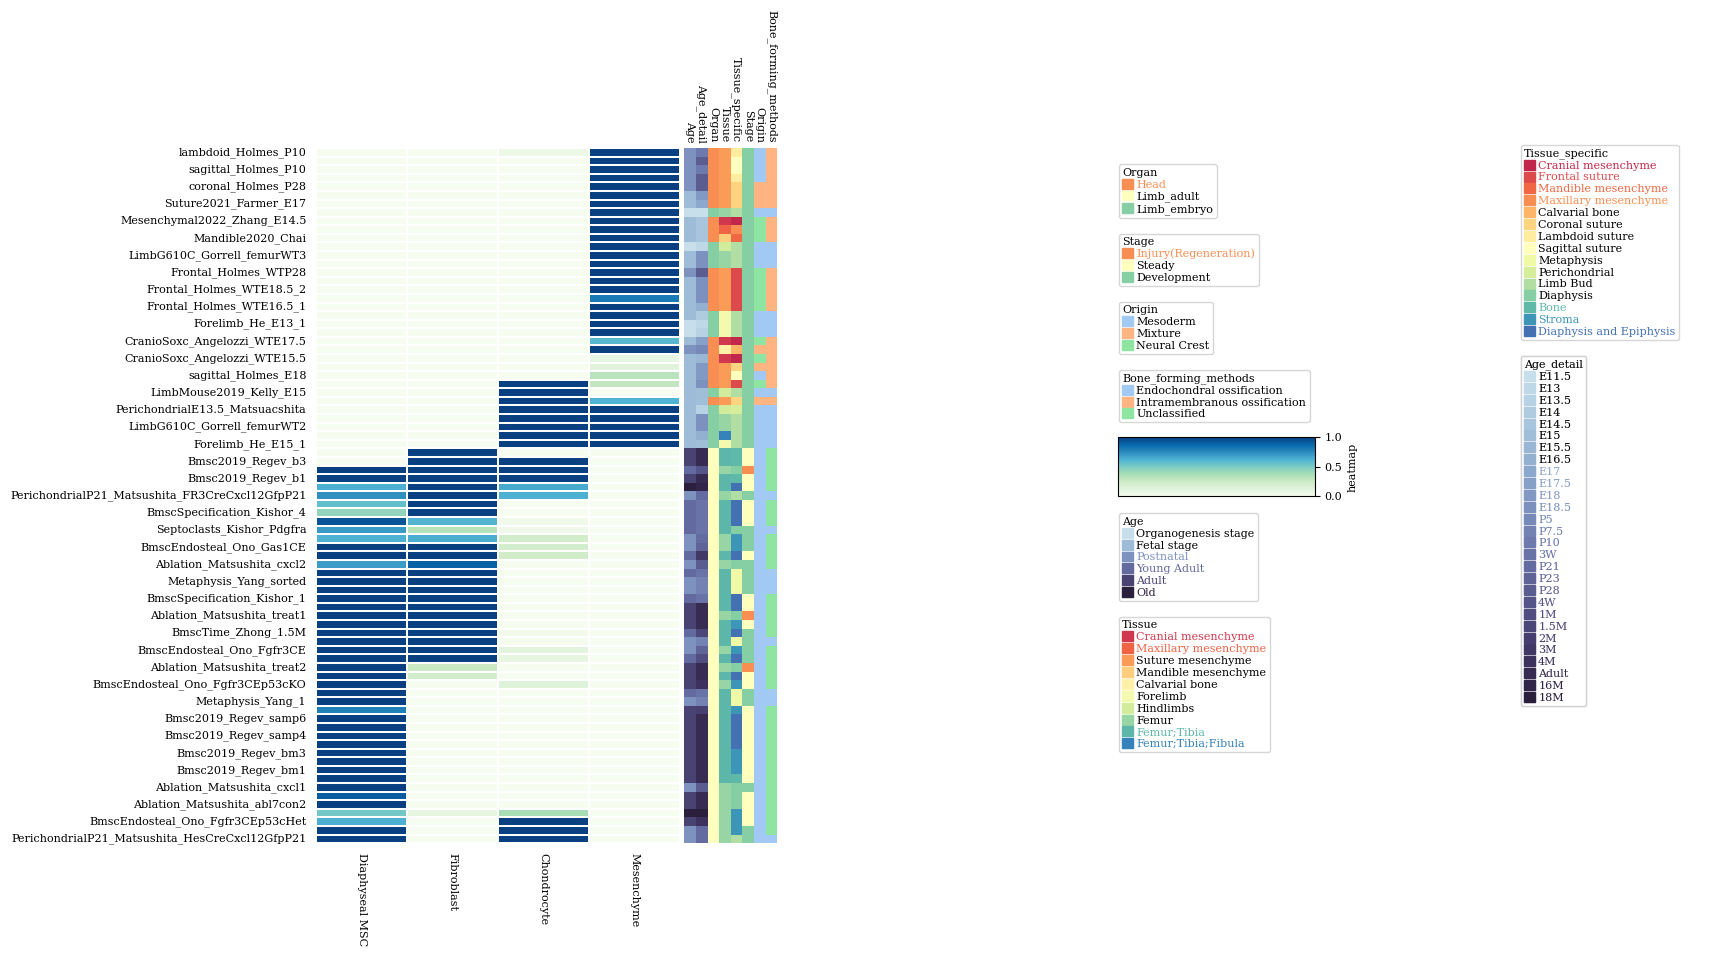

In [572]:
import PyComplexHeatmap
from PyComplexHeatmap import *
annoRow=table
annoRow.index=df_wide.index
row_ha = HeatmapAnnotation(Age=anno_simple(annoRow["Age"],colors=color_map_age),
                           Age_detail=anno_simple(annoRow["Age.In.Detail."],colors=color_map_ageindetail),
                           Organ=anno_simple(annoRow["Organ"],colors=color_map_organ),
                           Tissue=anno_simple(annoRow["Tissue"],colors=color_map_tissue),
                           Tissue_specific=anno_simple(annoRow["Tissue.Specific."],colors=color_map_tissuespecific),
                           Stage=anno_simple(annoRow["Stage"],colors=color_map_stage),
                           Origin=anno_simple(annoRow["Origin"],colors=color_map_orgin),
                           Bone_forming_methods=anno_simple(annoRow["Bone.Forming.Methods"],colors=color_map_form),axis=0)
plt.figure(figsize=(6, 8))

cm = ClusterMapPlotter(data=df_wide,right_annotation=row_ha,
                       linewidths=0.005,cmap="GnBu",linecolor = 'white',
                       show_rownames=True,show_colnames=True,legend_width=50)
plt.savefig("../result/5.16_paga_heatmap/paga_heatmap.pdf",dpi=300, bbox_inches='tight')

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


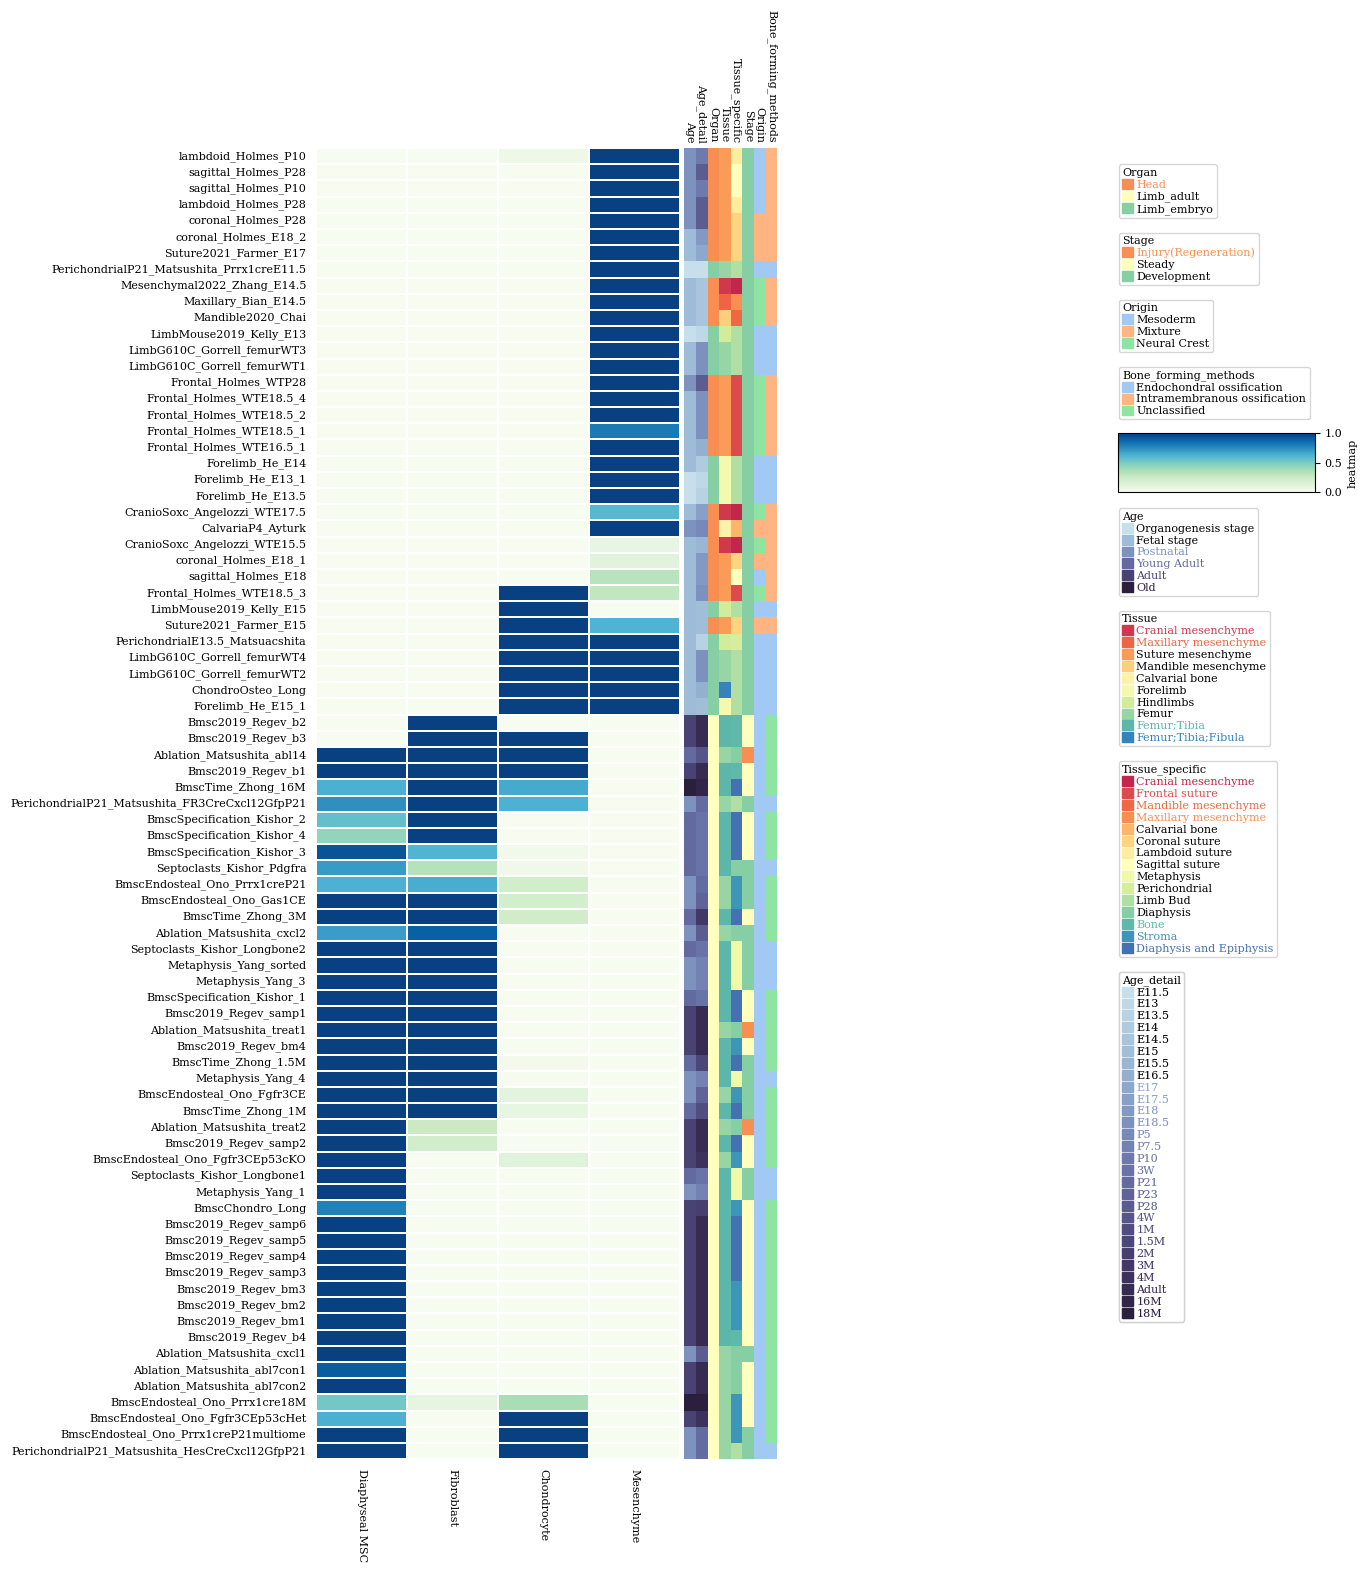

In [576]:
import PyComplexHeatmap
from PyComplexHeatmap import *
annoRow=table
annoRow.index=df_wide.index
row_ha = HeatmapAnnotation(Age=anno_simple(annoRow["Age"],colors=color_map_age),
                           Age_detail=anno_simple(annoRow["Age.In.Detail."],colors=color_map_ageindetail),
                           Organ=anno_simple(annoRow["Organ"],colors=color_map_organ),
                           Tissue=anno_simple(annoRow["Tissue"],colors=color_map_tissue),
                           Tissue_specific=anno_simple(annoRow["Tissue.Specific."],colors=color_map_tissuespecific),
                           Stage=anno_simple(annoRow["Stage"],colors=color_map_stage),
                           Origin=anno_simple(annoRow["Origin"],colors=color_map_orgin),
                           Bone_forming_methods=anno_simple(annoRow["Bone.Forming.Methods"],colors=color_map_form),axis=0)
plt.figure(figsize=(6, 15))

cm = ClusterMapPlotter(data=df_wide,right_annotation=row_ha,
                       linewidths=0.005,cmap="GnBu",linecolor = 'white',
                       show_rownames=True,show_colnames=True,legend_width=50)
plt.savefig("../result/5.16_paga_heatmap/paga_heatmap_long.pdf",dpi=300, bbox_inches='tight')

In [551]:
merged_df = pd.concat([table, df_wide], axis=1)

In [552]:
merged_df

,Age,Age.In.Detail.,Organ,Tissue,Tissue.Specific.,Stage,Bone.Forming.Methods,Origin,Chondrocyte,Diaphyseal MSC,Mesenchyme,Fibroblast
Column 2,,,,,,,,,,,,
Ablation_Matsushita_abl14,Young Adult,4W,Limb_adult,Femur,Diaphysis,Injury(Regeneration),Unclassified,Mesoderm,1.000000,1.000000,0.000000,1.000000
Ablation_Matsushita_abl7con1,Adult,Adult,Limb_adult,Femur,Diaphysis,Steady,Unclassified,Mesoderm,0.000000,0.911485,0.000000,0.000000
Ablation_Matsushita_abl7con2,Adult,Adult,Limb_adult,Femur,Diaphysis,Steady,Unclassified,Mesoderm,0.000000,1.000000,0.000000,0.000000
Ablation_Matsushita_cxcl1,Postnatal,P28,Limb_adult,Femur,Diaphysis,Development,Unclassified,Mesoderm,0.000000,1.000000,0.000000,0.000000
Ablation_Matsushita_cxcl2,Postnatal,P28,Limb_adult,Femur,Diaphysis,Development,Unclassified,Mesoderm,0.000000,0.698226,0.000000,0.895825
...,...,...,...,...,...,...,...,...,...,...,...,...
lambdoid_Holmes_P10,Postnatal,P10,Head,Suture mesenchyme,Lambdoid suture,Development,Intramembranous ossification,Mesoderm,0.056483,0.000000,1.000000,0.000000
lambdoid_Holmes_P28,Postnatal,P28,Head,Suture mesenchyme,Lambdoid suture,Development,Intramembranous ossification,Mesoderm,0.000000,0.000000,1.000000,0.000000
sagittal_Holmes_E18,Fetal stage,E18,Head,Suture mesenchyme,Sagittal suture,Development,Intramembranous ossification,Mesoderm,0.000000,0.000000,0.319684,0.000000


In [566]:
merged_df["Tissue.Specific."] = pd.Categorical(merged_df["Tissue.Specific."], categories=['Cranial mesenchyme',
       'Frontal suture', 'Mandible mesenchyme', 'Maxillary mesenchyme','Calvarial bone','Sagittal suture','Coronal suture', 'Lambdoid suture',
       'Metaphysis', 'Perichondrial', 'Limb Bud',
       'Diaphysis', 'Bone', 'Stroma', 'Diaphysis and Epiphysis'], ordered=True)

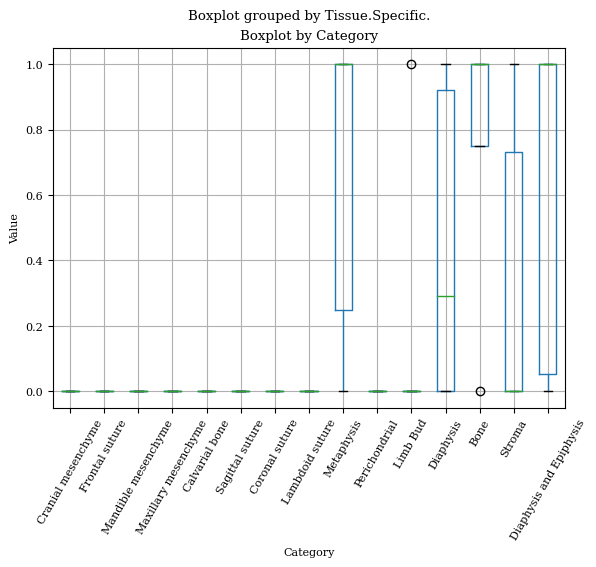

In [567]:
plt.rcParams.update({'font.size': 8, 'font.family': 'serif'})
merged_df.boxplot(column='Fibroblast', by='Tissue.Specific.')
# Set the plot title and axis labels
plt.title('Boxplot by Category')
plt.xticks(rotation=60)
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

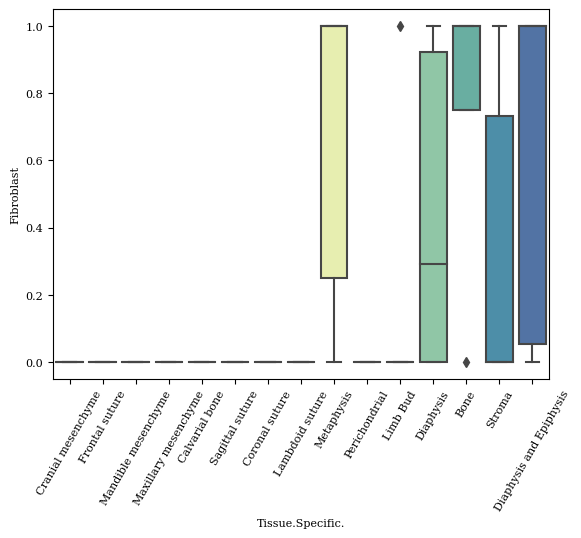

In [604]:
from seaborn import boxplot
boxplot(x="Tissue.Specific.",y="Fibroblast",data=merged_df,palette="Spectral")
plt.xticks(rotation=60)
plt.savefig("../result/5.16_paga_heatmap/tissue_spec_fibro.pdf",dpi=300, bbox_inches='tight')

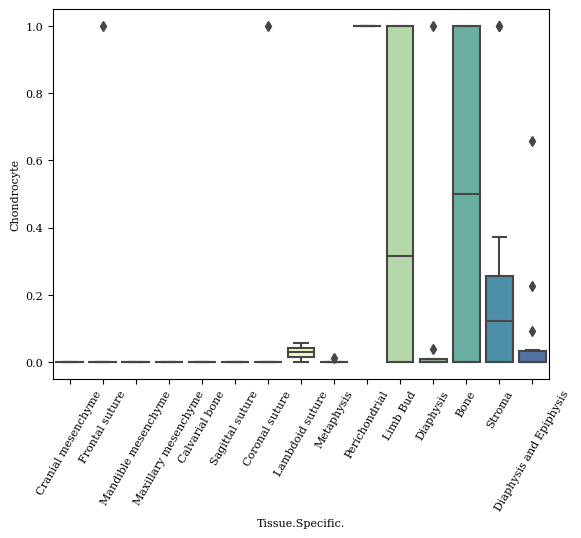

In [605]:
from seaborn import boxplot
boxplot(x="Tissue.Specific.",y="Chondrocyte",data=merged_df,palette="Spectral")
plt.xticks(rotation=60)
plt.savefig("../result/5.16_paga_heatmap/tissue_spec_chondro.pdf",dpi=300, bbox_inches='tight')

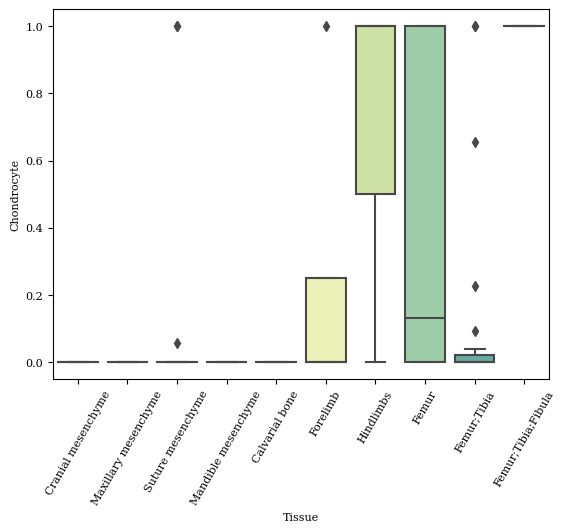

In [613]:
from seaborn import boxplot
boxplot(x="Tissue",y="Chondrocyte",data=merged_df,palette="Spectral")
plt.xticks(rotation=60)
plt.savefig("../result/5.16_paga_heatmap/tissue_chondro.pdf",dpi=300, bbox_inches='tight')

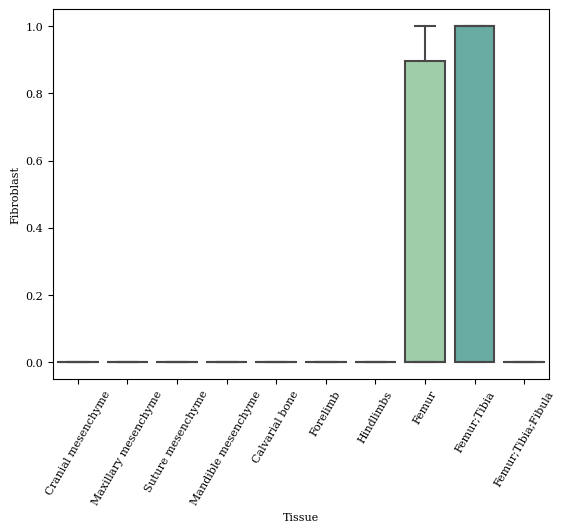

In [614]:
from seaborn import boxplot
boxplot(x="Tissue",y="Fibroblast",data=merged_df,palette="Spectral")
plt.xticks(rotation=60)
plt.savefig("../result/5.16_paga_heatmap/tissue_Fibroblast.pdf",dpi=300, bbox_inches='tight')

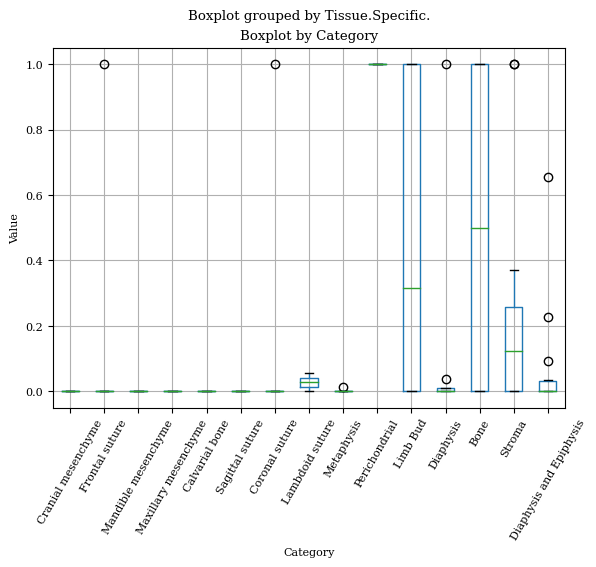

In [568]:
plt.rcParams.update({'font.size': 8, 'font.family': 'serif'})
merged_df.boxplot(column='Chondrocyte', by='Tissue.Specific.')
# Set the plot title and axis labels
plt.title('Boxplot by Category')
plt.xticks(rotation=60)
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

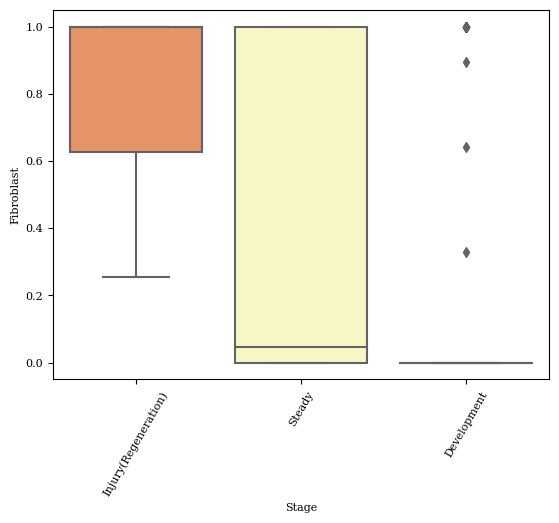

In [607]:
from seaborn import boxplot
boxplot(x="Stage",y="Fibroblast",data=merged_df,palette="Spectral")
plt.xticks(rotation=60)
plt.savefig("../result/5.16_paga_heatmap/stage_fibroblast.pdf",dpi=300, bbox_inches='tight')

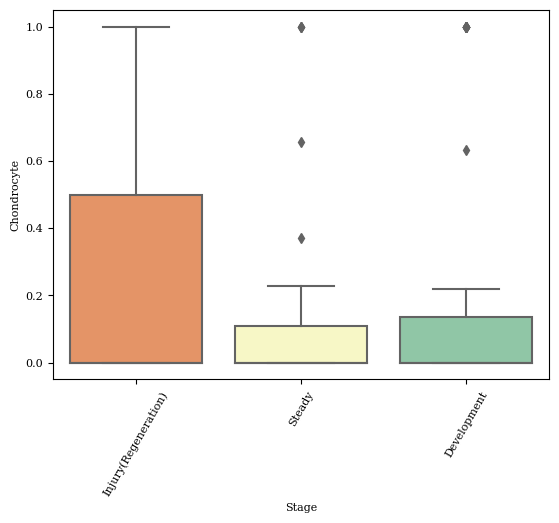

In [608]:
from seaborn import boxplot
boxplot(x="Stage",y="Chondrocyte",data=merged_df,palette="Spectral")
plt.xticks(rotation=60)
plt.savefig("../result/5.16_paga_heatmap/stage_chondrocyte.pdf",dpi=300, bbox_inches='tight')

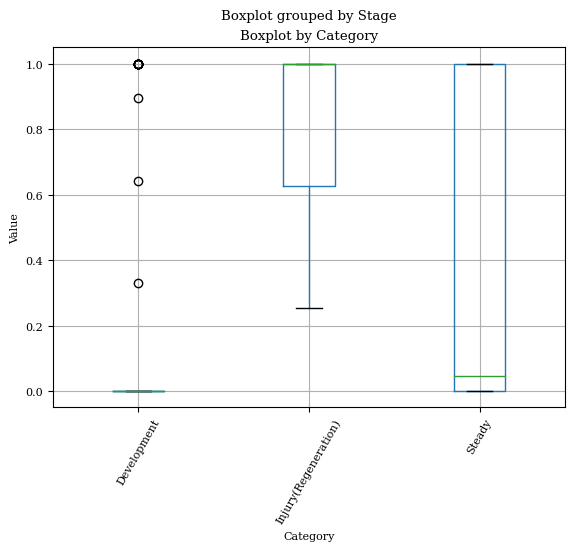

In [577]:
plt.rcParams.update({'font.size': 8, 'font.family': 'serif'})
merged_df.boxplot(column='Fibroblast', by='Stage')
# Set the plot title and axis labels
plt.title('Boxplot by Category')
plt.xticks(rotation=60)
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

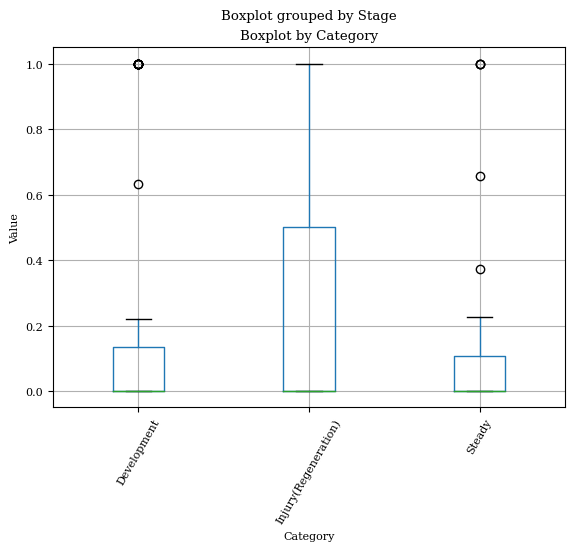

In [578]:
plt.rcParams.update({'font.size': 8, 'font.family': 'serif'})
merged_df.boxplot(column='Chondrocyte', by='Stage')
# Set the plot title and axis labels
plt.title('Boxplot by Category')
plt.xticks(rotation=60)
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

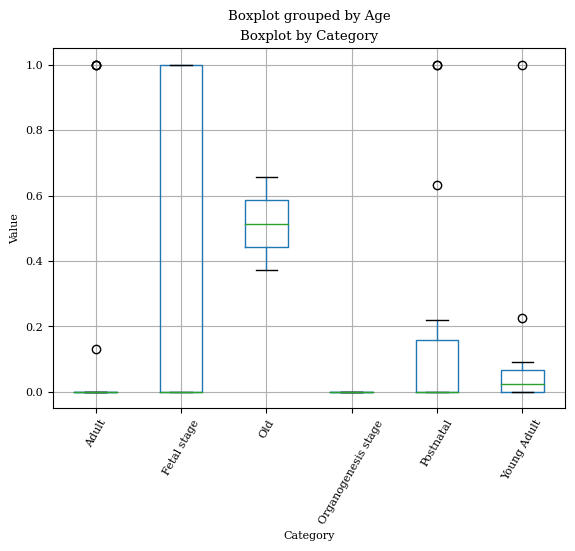

In [579]:
plt.rcParams.update({'font.size': 8, 'font.family': 'serif'})
merged_df.boxplot(column='Chondrocyte', by='Age')
# Set the plot title and axis labels
plt.title('Boxplot by Category')
plt.xticks(rotation=60)
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

In [ ]:
merged_df["Age"] = pd.Categorical(merged_df["Age"], categories=[ 'Organogenesis stage','Fetal stage', 'Postnatal', 'Young Adult', 'Adult','Old'], ordered=True)

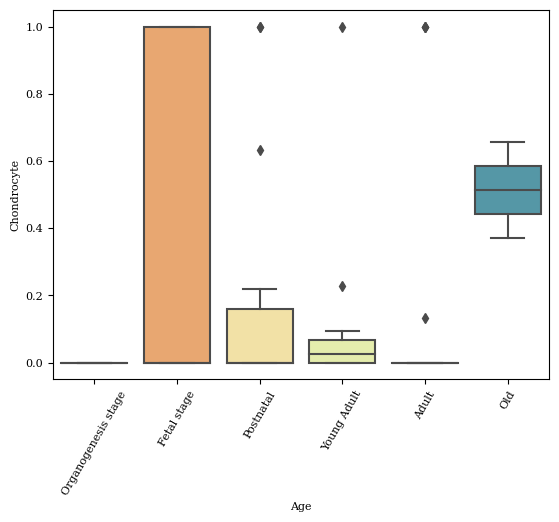

In [602]:
from seaborn import boxplot
boxplot(x="Age",y="Chondrocyte",data=merged_df,palette="Spectral")
plt.xticks(rotation=60)
plt.savefig("../result/5.16_paga_heatmap/age_chondrocyte.pdf",dpi=300, bbox_inches='tight')

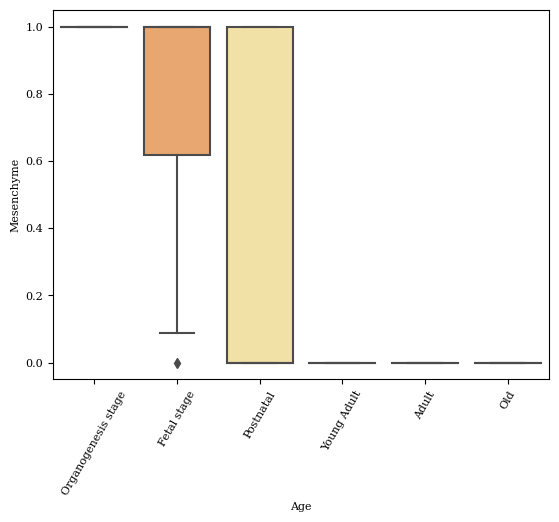

In [610]:
from seaborn import boxplot
boxplot(x="Age",y="Mesenchyme",data=merged_df,palette="Spectral")
plt.xticks(rotation=60)
plt.savefig("../result/5.16_paga_heatmap/age_mesenchyme.pdf",dpi=300, bbox_inches='tight')

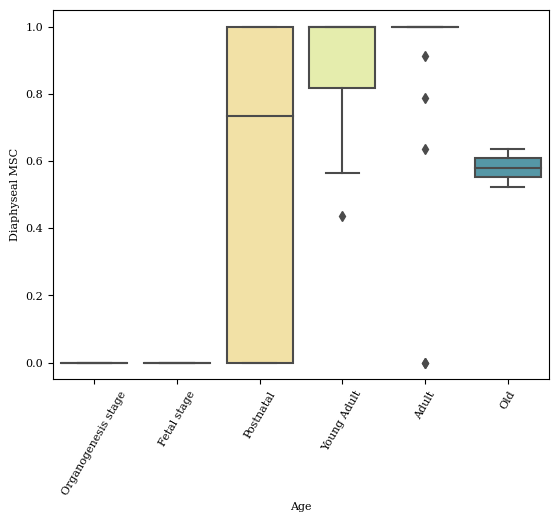

In [612]:
from seaborn import boxplot
boxplot(x="Age",y="Diaphyseal MSC",data=merged_df,palette="Spectral")
plt.xticks(rotation=60)
plt.savefig("../result/5.16_paga_heatmap/age_bmsc.pdf",dpi=300, bbox_inches='tight')

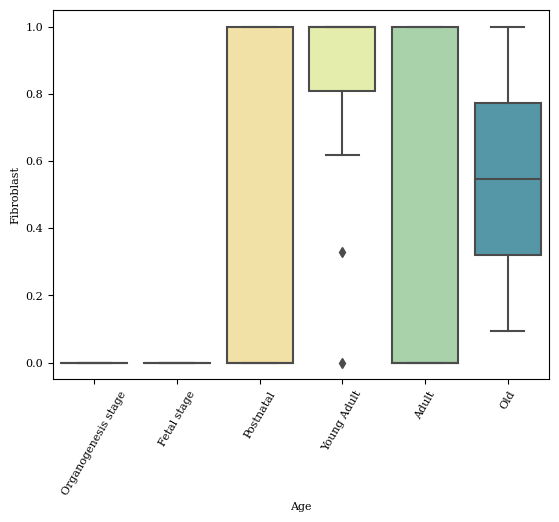

In [603]:
from seaborn import boxplot
boxplot(x="Age",y="Fibroblast",data=merged_df,palette="Spectral")
plt.xticks(rotation=60)
plt.savefig("../result/5.16_paga_heatmap/age_fibroblast.pdf",dpi=300, bbox_inches='tight')

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


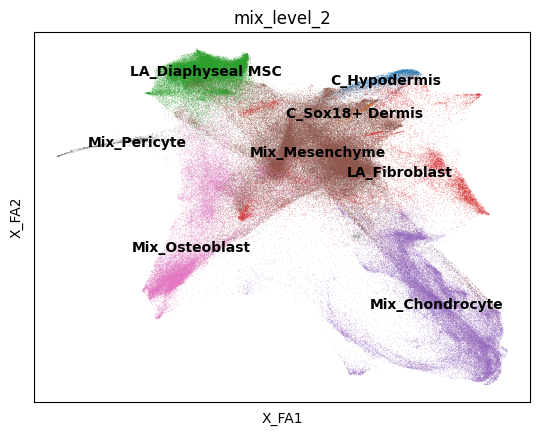

In [199]:
sc.pl.embedding(adata,color="mix_level_2",legend_loc="on data",basis="X_draw_graph_fa")

In [615]:
merged_df.to_csv("../processed_data/5.16_pamerged_dfgaheatmap_origdata.csv")

In [616]:
merged_df

,Age,Age.In.Detail.,Organ,Tissue,Tissue.Specific.,Stage,Bone.Forming.Methods,Origin,Chondrocyte,Diaphyseal MSC,Mesenchyme,Fibroblast
Column 2,,,,,,,,,,,,
Ablation_Matsushita_abl14,Young Adult,4W,Limb_adult,Femur,Diaphysis,Injury(Regeneration),Unclassified,Mesoderm,1.000000,1.000000,0.000000,1.000000
Ablation_Matsushita_abl7con1,Adult,Adult,Limb_adult,Femur,Diaphysis,Steady,Unclassified,Mesoderm,0.000000,0.911485,0.000000,0.000000
Ablation_Matsushita_abl7con2,Adult,Adult,Limb_adult,Femur,Diaphysis,Steady,Unclassified,Mesoderm,0.000000,1.000000,0.000000,0.000000
Ablation_Matsushita_cxcl1,Postnatal,P28,Limb_adult,Femur,Diaphysis,Development,Unclassified,Mesoderm,0.000000,1.000000,0.000000,0.000000
Ablation_Matsushita_cxcl2,Postnatal,P28,Limb_adult,Femur,Diaphysis,Development,Unclassified,Mesoderm,0.000000,0.698226,0.000000,0.895825
...,...,...,...,...,...,...,...,...,...,...,...,...
lambdoid_Holmes_P10,Postnatal,P10,Head,Suture mesenchyme,Lambdoid suture,Development,Intramembranous ossification,Mesoderm,0.056483,0.000000,1.000000,0.000000
lambdoid_Holmes_P28,Postnatal,P28,Head,Suture mesenchyme,Lambdoid suture,Development,Intramembranous ossification,Mesoderm,0.000000,0.000000,1.000000,0.000000
sagittal_Holmes_E18,Fetal stage,E18,Head,Suture mesenchyme,Sagittal suture,Development,Intramembranous ossification,Mesoderm,0.000000,0.000000,0.319684,0.000000


In [620]:
adata.obs=adata_obs

In [621]:
adata.write_h5ad("../../important_processed_data/5.22_integrate_adata.h5ad")

In [622]:
adata_obs.to_csv("../../important_processed_data/5.22_wtintegrate_metadata.csv")